<a href="https://colab.research.google.com/github/UjjwalSharma26/Capstone_EDA/blob/main/Ujjwal's_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [23]:
#importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [24]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
#uploading a csv file
hotel_booking = pd.read_csv("/content/drive/MyDrive/capstone project/Hotel Bookings.csv")

In [26]:
#to see column names in a data
hotel_booking.head(10).T

,0,1,2,3,4,5,6,7,8,9
hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel
is_canceled,0,0,0,0,0,0,0,0,1,1
lead_time,342,737,7,13,14,14,0,9,85,75
arrival_date_year,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015
arrival_date_month,July,July,July,July,July,July,July,July,July,July
arrival_date_week_number,27,27,27,27,27,27,27,27,27,27
arrival_date_day_of_month,1,1,1,1,1,1,1,1,1,1
stays_in_weekend_nights,0,0,0,0,0,0,0,0,0,0
stays_in_week_nights,0,0,1,1,2,2,2,2,3,3
adults,2,2,1,1,2,2,2,2,2,2


In [27]:
#let us find out length
len(hotel_booking)

119390

In [28]:
#let us find out no of rows and columns in a dataframe
hotel_booking.shape

(119390, 32)

In [29]:
#to find data type of each column
hotel_booking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [30]:
#to find out if null values are present in a column of a dataset
hotel_booking.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [31]:
#replacing all NaN values in 'children' with 0 and 'country' with xyz
hotel_booking['children'].fillna(0,inplace=True)
hotel_booking['country'].fillna('xyz',inplace=True)

In [32]:
#dropping the columns agent and company as they have excessive null values and are not of as such use
hotel_booking.drop(['agent','company'],axis=1,inplace=True)

In [33]:
#checking again whether null values have been removed
hotel_booking.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [34]:
hotel_booking.shape

(119390, 30)

In [35]:
#What are the Top 10 Countries of Origin of Hotel visitors (Guests)?
top_ten_countries =hotel_booking['country'].value_counts().head(10)
print(top_ten_countries)

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
ITA     3766
IRL     3375
BEL     2342
BRA     2224
NLD     2104
Name: country, dtype: int64


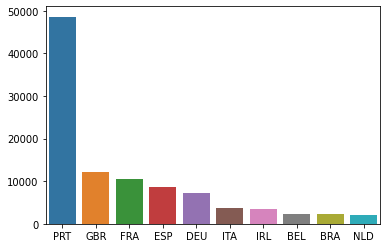

In [36]:
# 
sns.barplot(y=list(hotel_booking.country.value_counts().head (10)),x= list(hotel_booking.country.value_counts().head(10).index))

In [38]:
#Which Month is the Most Occupied with Bookings at the Hotel?
arrival_date_month.plot(kind=Bar)
 
plt.xlabel("Months")
plt.ylabel("count")
plt.title("Months Most Occupied")
plt.show()

NameError: ignored

Text(0, 0.5, 'ADR')

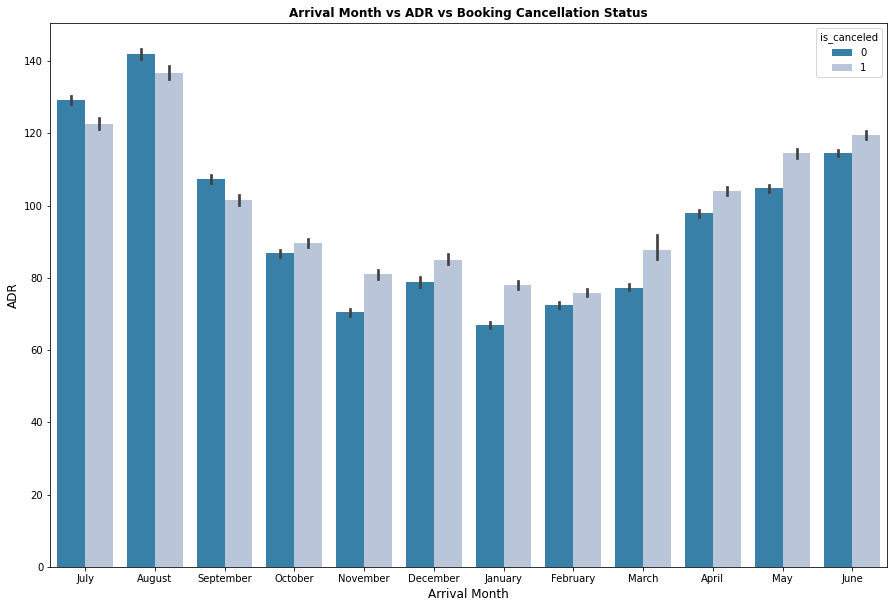

In [39]:
hotel_booking['adr'] = hotel_booking['adr'].astype(float)
plt.figure(figsize=(15,10))
sns.barplot(x='arrival_date_month', y='adr', hue='is_canceled', dodge=True, palette= 'PuBu_r', data=hotel_booking)
plt.title('Arrival Month vs ADR vs Booking Cancellation Status', weight='bold')
plt.xlabel('Arrival Month', fontsize=12)
plt.ylabel('ADR', fontsize=12)

In [40]:
hotel_booking['assigned_room_type'].unique()


array(['C', 'A', 'D', 'E', 'G', 'F', 'I', 'B', 'H', 'P', 'L', 'K'],
      dtype=object)